# Temperley bijection

Use (Peter's implementation of Wilson's algorithm)[https://petrelharp.github.io/applied_math/demos/index.html] to generate a uniformly random spanning tree of an $n \times n$ grid. Then apply Temperley's bijection to generate a perfect matching on its double graph - namely, a $(2n-1) \times (2n-1)$ grid with a corner removed.  Draw a picture of the perfect matching.



# Entropy per edge of a tiling

If $\mu$ is a probability measure on the finite space $\mathscr{S}$, we define the *entropy* of $\mu$ to be
$$
S(\mu) = \sum_{S} \mu(S) \log \mu(S)
$$
where the logarithm is usually taken base 2.

(a) Find a simpler formula for the entropy in the case where $\mu$ is the uniform measure.

(b) Verify that a perfect matching on the order $n$ aztec diamond has $n^2+n$ edges.  Let $\mu$ be the uniform measure on perfect matchings of the order $n$ aztec diamond.  Then compute
$$
\frac{S(\mu)}{n^2+n}
$$
For large $n$, this quantity approaches a constant $K$.  Find $K$.  $K$ might be called the *entropy per edge*, or something along those lines.

(c) Repeat the computation in $b$ for the graph you simulated in the previous question: the $(2n-1) \times (2n-1)$ grid with a corner removed - where in place of $n^2+n$ you use the number of edges in a perfect matching on this graph.  For this part, it's OK just to approximate the constant $K$, and use the spanning tree count from the previous assignment.

(d) Use the (admittedly somewhat mysterious) code below to draw a picture of a perfect matching of a large Aztec diamond; explain, using the two pictures, why the value of $K$ you found in part $(c)$ is bigger than the one in part $(b)$.


In [174]:
import random

M = [[1,2],[2,1]]
def interlace_hf(M):
    a = lambda i,j: M[i][j] + 1
    n = len(M)    
    result = [list(range(0, 2*n+2, 2))]
    for i in range(n-1):
        row = [2*(i+1)]
        for j in range(n-1):
            modulus = (2*i + 2*j) % 4
            avg = sum(a(u,v) for u in range(i,i+2) for v in range(j,j+2))//4
            choices = [x for x in range(avg-2, avg+3) if x % 4 == modulus]
            if len(choices) == 2:
                row.append(random.choice(choices))
            else:
                row.append(choices[0])
        row.append(2*n - row[0] )
        result.append(row)
    result.append(list(reversed(result[0])))
    return result

def interlace_n_times(M, n):
    for i in range(n-1):
        M = interlace_hf(M)
    return M

In [162]:
import matplotlib
import matplotlib.pyplot as plt

In [163]:
# setup: has to be in a separate cell for some reason
plt.rcParams['figure.figsize'] = [8, 8]

In [ ]:
def aztec_diamond_matching(n):
    A = interlace_n_times(M,n)
    B = interlace_hf(A)
    n = len(A)
    fig, ax = plt.subplots()
    for i in range(n):
        for j in range(n):
            if abs(B[i][j] - A[i][j]-1) == 3:
                ax.plot((i, i-0.5), (j-0.5, j), color="red")
            if abs(B[i+1][j+1] - A[i][j] - 1) == 3:
                ax.plot((i+0.5, i), (j, j+0.5),color="green")
            if abs(B[i+1][j] - A[i][j] - 1) == 3:
                ax.plot((i+0.5, i), (j, j-0.5),color="blue")
            if abs(B[i][j+1] - A[i][j] - 1) == 3:
                ax.plot((i, i-0.5), (j+0.5, j),color="orange")                
    return ax
    

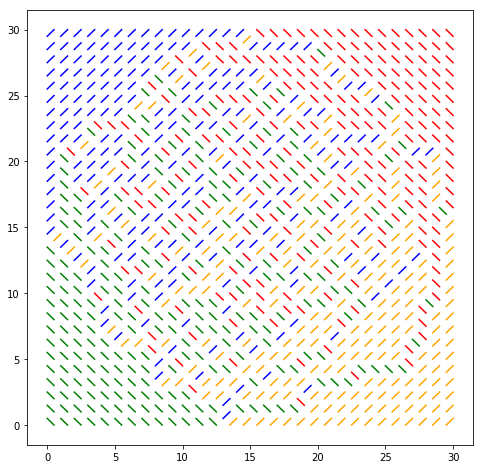

In [172]:
aztec_diamond_matching(30)